In [26]:
# PyTorchライブラリの読み込み
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# sklearnライブラリの読み込み
from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

# pandas
import pandas as pd

# matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [27]:
# データセット読み込み
mnist = datasets.fetch_mldata('MNIST original', data_home='./data')

In [28]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [30]:
# 説明変数を正規化して格納し表示
mnist_data = mnist.data / 255

# DataFrame形式で説明変数を表示
pd.DataFrame(mnist_data).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


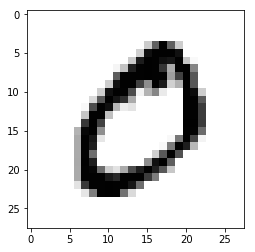

In [31]:
# １枚目の画像を表示
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

In [32]:
# 目的変数の格納と表示
mnist_label = mnist.target
mnist_label

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [36]:
# 訓練データの件数
train_size = 5000
# テストデータの件数
test_size = 500

# データセットを訓練用とテスト用に分割
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, mnist_label, train_size=train_size, test_size=test_size)

In [37]:
# 訓練用のテンソル作成
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

# テスト用のテンソル作成
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

# テンソルの件数を表示
print(train_X.shape)
print(train_Y.shape)

torch.Size([5000, 784])
torch.Size([5000])


In [38]:
# 説明変数と目的変数のテンソルをまとめる
train = TensorDataset(train_X, train_Y)

# 一つ目のテンソルを確認
print(train[0])

(tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
     

In [39]:
# ミニバッチに分ける
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [40]:
# ネットワークの作成
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x)
    
# インスタンスの生成
model = Net()

In [41]:
# モデルの学習
# 誤差関数のセット
criterion = nn.CrossEntropyLoss()

# 最適化関数のセット
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 学習開始
for epoch in range(1000):
    total_loss = 0
    # 分割したデータを取り出す
    for train_x, train_y in train_loader:
        # 計算グラフの構築
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 勾配をリセットする
        optimizer.zero_grad()
        # 順伝播の計算
        output = model(train_x)
        # 誤差の計算
        loss = criterion(output, train_y)
        # 逆伝播の計算
        loss.backward()
        # 重みの更新
        optimizer.step()
        # 誤差の累積
        total_loss += loss.data[0]
    # 累積誤差を100回ごとに表示
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

/Users/akihiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/akihiro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


100 tensor(29.5220)
200 tensor(3.4068)
300 tensor(0.5110)
400 tensor(0.2178)
500 tensor(0.1451)
600 tensor(0.1472)
700 tensor(1.00000e-02 *
       7.1167)
800 tensor(1.00000e-02 *
       6.2511)
900 tensor(1.00000e-02 *
       6.0272)
1000 tensor(1.00000e-02 *
       9.0533)


In [42]:
# 計算グラフの構築
test_x, test_y = Variable(test_x), Variable(test_y)
# 出力が0と1のどちらか
result = torch.max(model(test_x).data, 1)[1]
# モデルの精度を計算
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())

# モデル精度の表示
accuracy

NameError: name 'test_x' is not defined